<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">IMPORTING LIBRARIES</h1>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline


<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">DATA ANALYSIS</h1>
<br>

In [2]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   gender                    299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">DATA VISUALIZATION</h1>
<br>

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

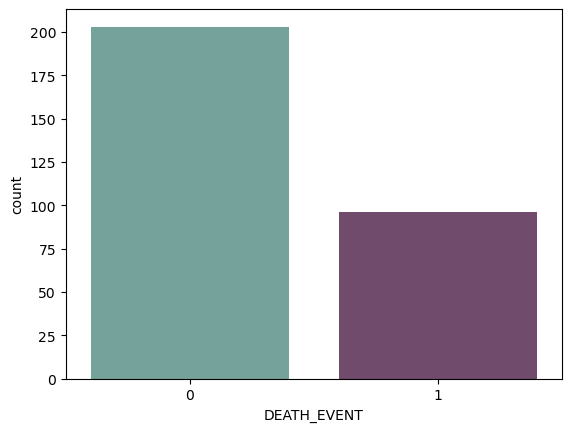

In [4]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">DATA MODEL</h1>
<br>

In [5]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [6]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
gender,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [7]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

model = SVC(probability=True)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))

print("\n\nModel has a score of:", end = "\t")
print(model.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        57
           1       0.86      0.67      0.75        18

    accuracy                           0.89        75
   macro avg       0.88      0.82      0.84        75
weighted avg       0.89      0.89      0.89        75



Model has a score of:	0.8933333333333333


<AxesSubplot:>

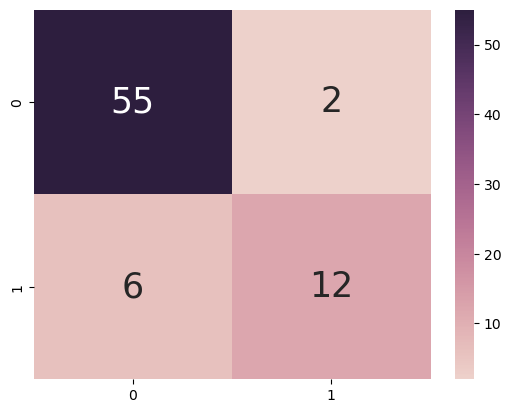

In [8]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), annot_kws = {'size':25})

<br>
<h1 style="background-color:#db4866;text-align:center;color:whitesmoke;border-radius:30px;margin:0px;padding:20px;letter-spacing: 1px;text-shadow: 1px 1px 1px black;font-size:3rem">PREDICTING OUTPUT</h1>
<br>

In [11]:
# age = input("Enter Age: ")
# anaemia = input("If patient has decreased red blood cells(Y/N): ")
# creatinine_phosphokinase = input("Enter Level of the CPK enzyme in the blood in mcg/L: ")
# diabetes = input("If the patient has diabetic(Y/N): ")
# ejection_fraction = input("Percentage of blood leaving the heart at each contraction(Ejection Fraction): ")
# high_blood_pressure = input("If patient has high blood pressure?(Y/N): ")
# platelets = input("Amount of platlets: ")
# serum_creatinine = input("Enter Level of serum creatinine in the blood mg/dL: ")
# serum_sodium = input("Enter Level of serum sodium in the blood (mEq/L): ")
# gender = input("Enter Gender of patient(M/F): ")
# smoking = input("Does patient smoke(Y/N): ")
# time = input("Time in care: ")

# [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets,
#                  serum_creatinine, serum_sodium, gender, smoking, time]

arr = np.array([
                [75,0,582.0,0,20.0,1,265000,1.9,130,1,0,4],
               [55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271],
               [45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280]])

X_new= s_scaler.fit_transform(arr)
X_new = pd.DataFrame(X_new, columns=col_names)

y_pred = model.predict_proba(X_new)

prob = y_pred[0]

print("\n\nProbability of a Heart Failure is",prob[0] * 100,"%\n\n")



Probability of a Heart Failure is 11.917997826478862 %




In [12]:
print("X=%s, Predicted=%s" % (X_new, y_pred))

X_new.describe().T

print("X=%s, Predicted=%s" % (X_new, y_pred))
#requires multiple scalar data to work else gives only 1 as predicted value

X=        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  1.336306      0.0                 -1.341102       0.0          -1.414214   
1 -0.267261      0.0                  0.281854       0.0           0.707107   
2 -1.069045      0.0                  1.059247       0.0           0.707107   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium    gender  \
0             1.414214   0.665129          1.358732     -1.408374  0.707107   
1            -0.707107   0.748270         -1.019049      0.592999 -1.414214   
2            -0.707107  -1.413399         -0.339683      0.815374  0.707107   

    smoking      time  
0 -0.707107 -1.413631  
1 -0.707107  0.671670  
2  1.414214  0.741961  , Predicted=[[0.11917998 0.88082002]
 [0.96214733 0.03785267]
 [0.93441096 0.06558904]]
X=        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  1.336306      0.0                 -1.341102       0.0          -1.414214   
1 -0.267261      0.0 